# Fraudulent Job Posting System

This project predicts whether the job is fraudulent or not based on given features.

## Data Source: <br>
[Source](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction)

# Step 1: Importing Library and Reading data

## Libraries Used:



1.   Numpy - For array manipulation
2.   Pandas - For Tabular data manipulation
3.   Matplotlib and seaborn - For Data Visualization
4.   Scikit Learn - For data preprocessing and modeling
5.   Imblearn - For Sampling of data and model pipelining
6.   Nltk, string and re(regular expression) - For useful text extraction
7.   Xgboost -  For model training
8.   Scipy - For Stacking input models (when experimentation)
9.   WordCloud - For textual visualization
10.  Missingno - For Missing Data Visualization
11.  Joblib - For Model Serialization and Deserialization.
 

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import warnings
import time 
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import missingno

In [ ]:
# Preprocessing tools 
from sklearn.preprocessing import (StandardScaler, LabelEncoder, LabelBinarizer,
                                   OneHotEncoder) 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.compose import ColumnTransformer
# Models
from sklearn.tree import DecisionTreeClassifier 
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
# Evaluation Metrics
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, auc, 
                             confusion_matrix, roc_curve, f1_score, 
                             precision_score, recall_score,roc_auc_score,
                             ConfusionMatrixDisplay, classification_report)
# For stacking inputs
from scipy.sparse import hstack
# Hyper parameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV
# For Displaying Pipelines
from sklearn import set_config



In [ ]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer 
from nltk.stem import WordNetLemmatizer

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/project/fake_job_postings.csv')

# Step 2: Data Description

We are using following functions for looking after data description:

1. head
2. tail
3. info
4. describe
- Numeric
- Object data
5. Null Check using `.isnull()` and `.sum()`
6. Columns of dataset.
7. Unique value for categorical data.
8. Checking imbalance of the dataset.
9. Check Duplicates.

In [ ]:
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.tail(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.describe(include=np.number)

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.describe(include='O')

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15185,10670,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11968,6205,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


In [ ]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [ ]:
print("Unique Values in categorical columns: \n")
for column in ['title','location','department','employment_type','required_experience','required_education']:
  print(f"Column Name: `{column}` and its unique values: \n {df[column].unique()} \n" )

Unique Values in categorical columns: 

Column Name: `title` and its unique values: 
 ['Marketing Intern' 'Customer Service - Cloud Video Production'
 'Commissioning Machinery Assistant (CMA)' ...
 'Senior Financial Analyst (Retail) ' 'Account Director - Distribution '
 'Project Cost Control Staff Engineer - Cost Control Exp - TX'] 

Column Name: `location` and its unique values: 
 ['US, NY, New York' 'NZ, , Auckland' 'US, IA, Wever' ...
 'US, CA, los Angeles' 'CA, , Ottawa' 'GB, WSX, Chichester'] 

Column Name: `department` and its unique values: 
 ['Marketing' 'Success' nan ... 'Admin - Clerical' 'Administrative Dept'
 'Hospitality'] 

Column Name: `employment_type` and its unique values: 
 ['Other' 'Full-time' nan 'Part-time' 'Contract' 'Temporary'] 

Column Name: `required_experience` and its unique values: 
 ['Internship' 'Not Applicable' nan 'Mid-Senior level' 'Associate'
 'Entry level' 'Executive' 'Director'] 

Column Name: `required_education` and its unique values: 
 [nan "Bac

In [ ]:
# Unique values of each columns
print(df.apply(lambda col: col.nunique()))

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().apply(pd.value_counts)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880.0,17880.0,17534,6333,2868,14572,17879,15185,10670,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0
True,NaN,NaN,346,11547,15012,3308,1,2695,7210,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN


In [ ]:
len(df[df['fraudulent']==0])

866

# Step 3: Exploratory Data Analysis

1. Correlation Heatmap
2. Count plot for output labels.<br>
    a. Based on fraud jobs<br>
    b. Based on Employment type.
3. Box Plot of numerical datas.
4. Pie Chart for Job Posted<br> 
    a. based on job areas <br>
    b. Fraud jobs by areas
5. Word cloud of non fraud job titles.
6. Missing Datas visualization.



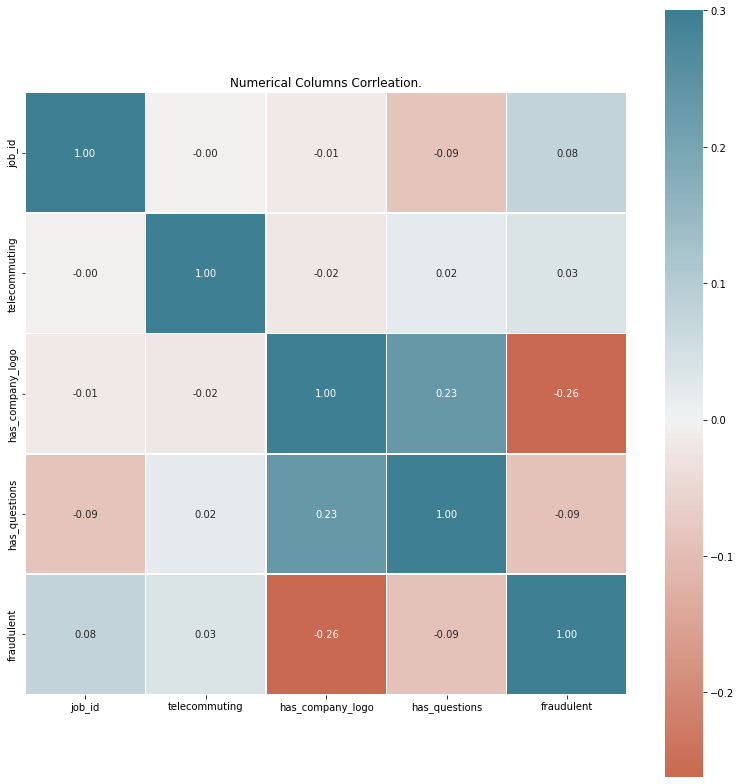

In [ ]:
correlation = df.corr() 

fig, ax = plt.subplots(figsize=(11, 11))
cmap = sns.diverging_palette(20, 220, n=256, as_cmap=True)
sns.heatmap(correlation, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=.5,
            annot = True,
            fmt='.2f',)

plt.title('Numerical Columns Corrleation.')
plt.tight_layout()

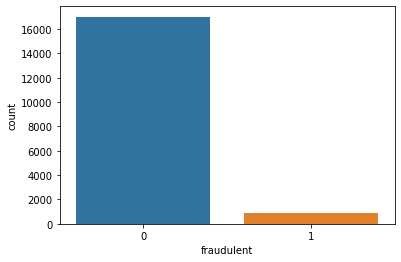

In [ ]:
# Fraudulent class check
sns.countplot(x='fraudulent',data=df)

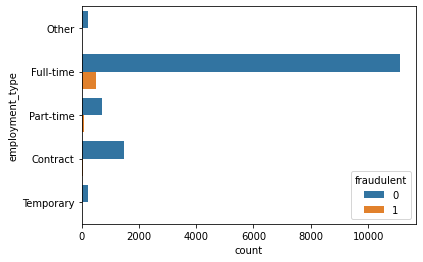

In [ ]:
sns.countplot(y='employment_type', hue = 'fraudulent', data=df)

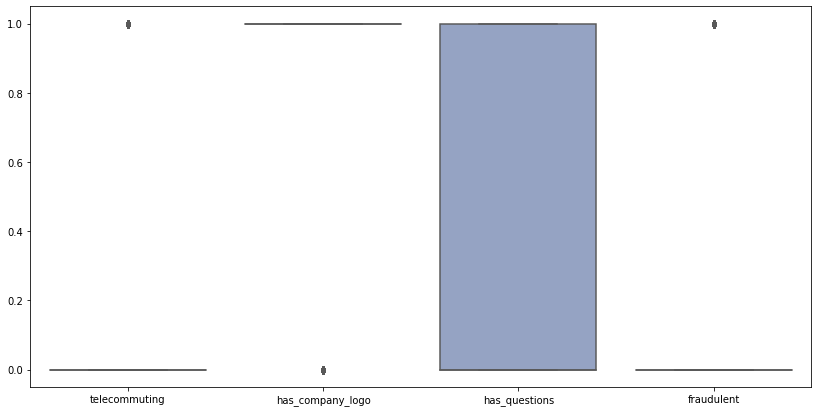

In [ ]:
plt.figure(figsize=[14,7])
df_num = df.select_dtypes(np.number)
df_num.drop('job_id',axis=1, inplace=True)
sns.boxplot(data = df_num, palette="Set2")

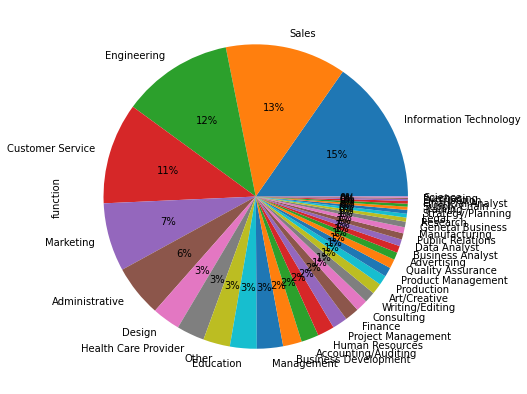

In [ ]:
plt.figure(figsize=[14,7])
job_functions  = df['function'].value_counts()
job_functions.plot.pie(autopct='%.f%%')
plt.show()

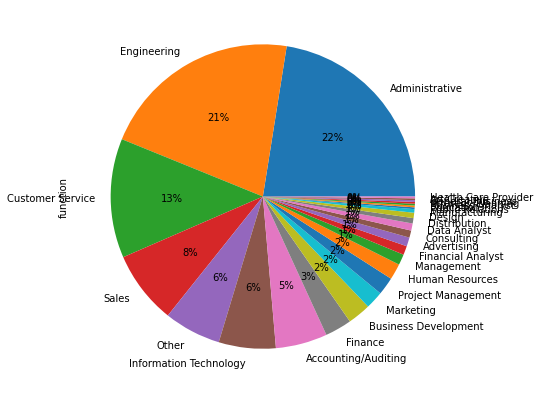

In [ ]:
plt.figure(figsize=[14,7])
fraud_jobs = df[df['fraudulent'] == 1]['function'].value_counts()
fraud_jobs.plot.pie(autopct='%.f%%')
plt.show()

In [ ]:

non_fraud_titles = df[df['fraudulent']==0]['title']
fraud_titles = df[df['fraudulent']==0]['title']

non_fraud_title_combined = ''
fraud_title_combined = ''
for title in non_fraud_titles:
  non_fraud_title_combined+=title

for title in fraud_titles:
  fraud_title_combined+=title

# print(f"{non_fraud_title_combined}")



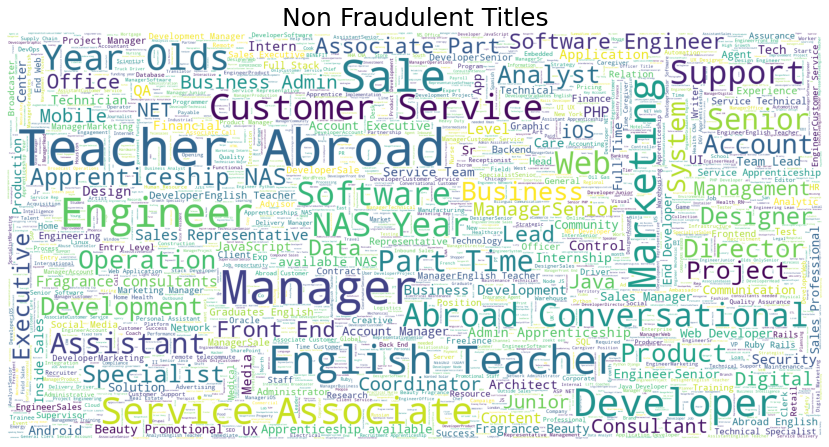

In [ ]:
plt.figure(figsize=[15,7.5])
wordcloud = WordCloud(width=1600, height=800,background_color="white",max_words=len(non_fraud_titles),
                      max_font_size=100, relative_scaling=.5).generate(non_fraud_title_combined)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Non Fraudulent Titles",fontsize=25)
plt.show()

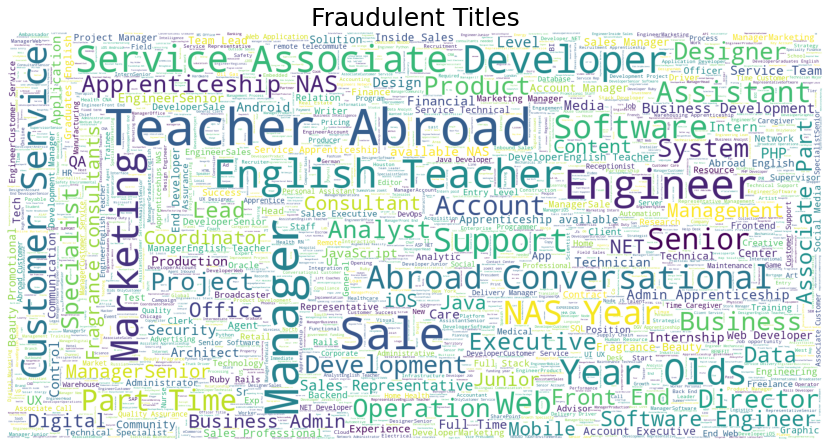

In [ ]:
plt.figure(figsize=[15,7.5])
wordcloud = WordCloud(width=1600, height=800,background_color="white",max_words=len(fraud_titles),
                      max_font_size=100, relative_scaling=.5).generate(fraud_title_combined)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Fraudulent Titles", fontsize=25)
plt.show()

Text(0.5, 1.0, 'missing data Visualization')

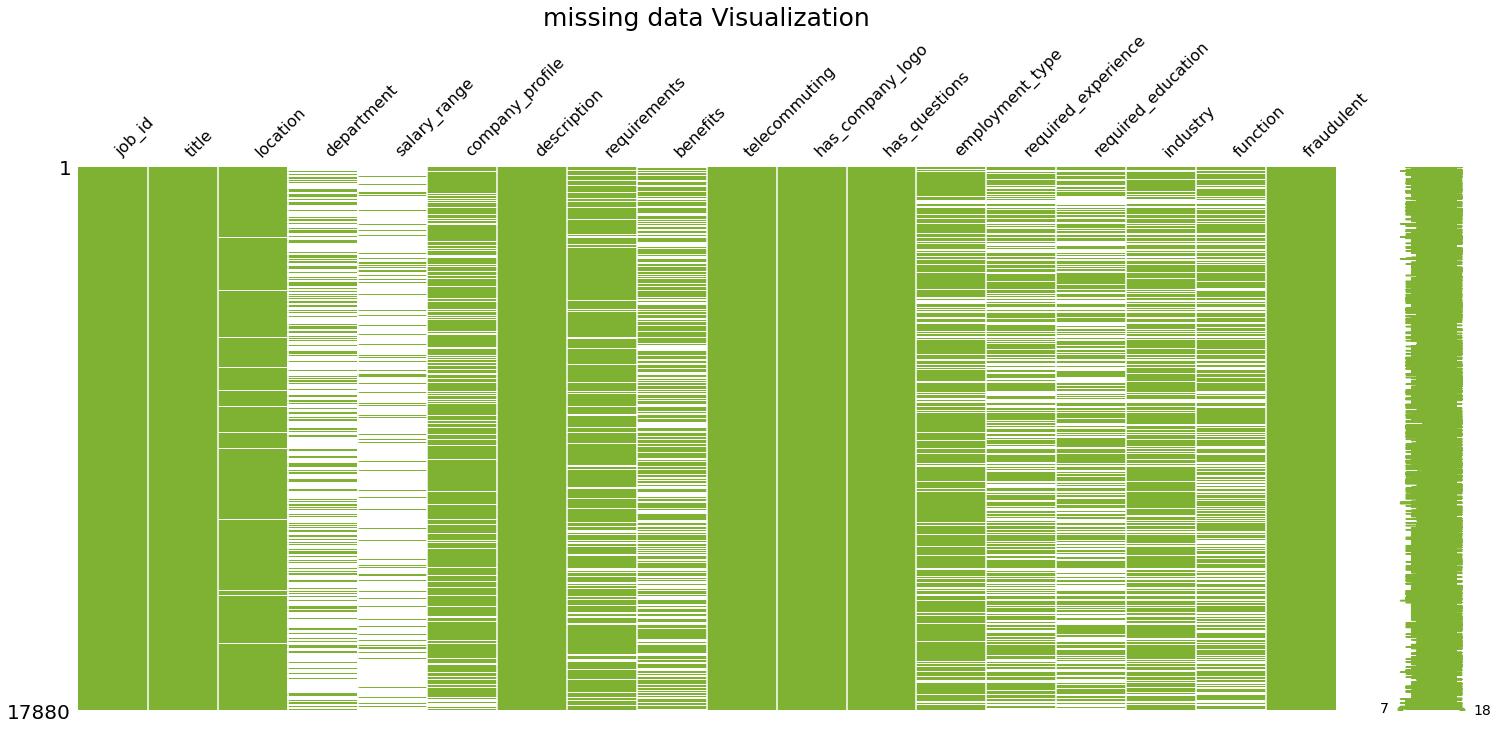

In [ ]:
missingno.matrix(df,color=(0.5, 0.7, 0.2))
plt.title("missing data Visualization", fontsize=25)

# Step 4: Base Line Project Model

Checking evaluation metrics using a dummy classifier.

1. Creating copy of `df` into `baseline_data`.
2. Creating and using `clean_text()` function to clean `title` and `requirements` column.
3. Splitting dataset into training and test set.
4. Using `DummyClassifier()` to predict the output. 

In [ ]:
baseline_data = df.copy(deep = True)
baseline_data.head(n=2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [ ]:
print(f"fraudulent and non fraudulent class:\n{baseline_data['fraudulent'].value_counts()} \n")
print(f"Unique values in 'function' column:{len(baseline_data['function'].unique())}")

fraudulent and non fraudulent class:
0    17014
1      866
Name: fraudulent, dtype: int64 

Unique values in 'function' column:38


In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

sample_text = """ 
              https://google.com Hello (texts inside bracket) ##8& 78 45
              """

clean_text(sample_text)
baseline_data["requirements"] = baseline_data["requirements"].apply(lambda x: clean_text(x))
baseline_data["title"] = baseline_data["title"].apply(lambda x: clean_text(x))


In [ ]:
*X_cols, y_cols = list(baseline_data.columns)
X_baseline = baseline_data[X_cols]
y_baseline = baseline_data[y_cols]

In [ ]:
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X_baseline, y_baseline, test_size=0.2, random_state=42)

In [ ]:
clf = DummyClassifier(strategy="most_frequent",random_state=42)
clf.fit(X_train_baseline, y_train_baseline)

predictions = clf.predict(X_test_baseline)

In [ ]:
accuracy = accuracy_score(y_test_baseline, predictions)
balanced_accuracy = balanced_accuracy_score(y_test_baseline, predictions)
precision = precision_score(y_test_baseline, predictions, average="macro")
recall = recall_score(y_test_baseline, predictions, average="macro")

f1 = f1_score(y_test_baseline, predictions, average="macro")
fpr, tpr, thresholds = roc_curve(y_test_baseline, predictions, pos_label=1)
auc_score = auc(fpr, tpr)

print(f"""
    accuracy: {accuracy},
    balanced_accuracy: {balanced_accuracy},
    precision: {precision},
    recall: {recall},
    f1-score: {f1},
    auc score: {auc_score}
  """)


    accuracy: 0.9493847874720358,
    balanced_accuracy: 0.5,
    precision: 0.4746923937360179,
    recall: 0.5,
    f1-score: 0.4870176445273275,
    auc score: 0.5
  


# Step 5:  Preprocessing and Feature engineering

## 5.1 Creating new columns `country` and `state`
  
1. Removing `location`'s nan values
2. Seperating unwanted columns to `df_dropped` dataframe.
3. Splitting  `location` column into `country` and `state` columns. in `df_dropped` dataframe.
4. Removing nan values of `states`.

In [ ]:
df.drop('job_id', axis=1, inplace = True)

In [ ]:
df = df[df['location'].notna()]

In [ ]:
#drop unwanted columns 
columns_to_drop = ['description', 'requirements', 'benefits', 'company_profile', 'location', 'salary_range']
df_dropped = df.drop(columns_to_drop, axis = 1)

In [ ]:
country_col = df["location"].str.split(pat = ",")
country_col.dropna()
country = []
state = []

In [ ]:
def split_location(columns):
  for var in columns:
    if var != None:
      if len(var) <= 3:
        if len(var) > 0:
          country.append(var[0])
        else:
          country.append(None)
        if len(var) > 1:
          state.append(var[1])
        else:
          state.append(None)
      else:
        country.append(None)
        state.append(None)
  return country,state

In [ ]:
country, state = split_location(country_col)
df_dropped["country"] = country
df_dropped["state"] = state
feature_eng_df = df_dropped[df_dropped['state'].notna()]

# [Experiment]
## 5.2 Imputing missing values and Nan values using `RandomForestClassifier`

1. Seperating Columns with Missing values (`columns_to_predict`) and Non missing values (`non_na_columns`).<br>
  Also, Seperating categorical and object columns to `columnsToEncode`.<br><br>
2. Encoding `columnsToEncode` with `LabelEncoder()`  <br><br>
3. selecting each column training the data(`non_na_columns`) on random forest model and predicting NAN values of each column (`columns_to_predict`)


In [ ]:
dataset = feature_eng_df.copy(deep = True)
non_na_columns = ['title', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent', 'country', 'state']
columns_to_predict = ['employment_type','function', 'required_experience', 'industry', 'required_education', 'department' ]

columnsToEncode = list(dataset.select_dtypes(include=['category','object']))

In [ ]:
le = LabelEncoder()
for feature in columnsToEncode and non_na_columns:
    
    try:
        dataset[feature] = le.fit_transform(dataset[feature])
        #print(feature)
    except:
        print('Error encoding '+feature)


#### 5.2.3 Using `non_na_columns` to impute `columns_to_predict` columns.

For each prediction columns.

1. LabelEncoding columns to be imputed.
2. splitting na and not na rows.
3. creating a model and making prediction to the given column.
4. Updating the `dataset` dataframe.

In [ ]:
def impuate_na(column_name, dataset, encoder, columns_to_predict, model):
  new_data = dataset.copy(deep= True)
  # na rows check
  not_na_rows = new_data[column_name].notna()
  new_data = new_data[not_na_rows]
  # y_train operations 
  y = new_data[column_name]
  # encoding
  y = encoder.fit_transform(y)
  # encoded in dataset
  dataset.loc[not_na_rows,column_name] = y
  # X_train operations
  X = new_data.drop(columns_to_predict, axis = 1)

  # 
  prediction_dataset = dataset.copy(deep = True)
  na_rows = prediction_dataset[column_name].isna()
  prediction_dataset = prediction_dataset[na_rows]
  prediction_dataset.drop(columns_to_predict, axis=1, inplace = True)

  # train-test-split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 42)
  model.fit(X_train, y_train)
  y_pred = model.predict(prediction_dataset)
  dataset_na_rows = dataset[column_name].isnull()
  dataset.loc[dataset_na_rows,column_name] = y_pred
  return dataset 



In [ ]:
model = RandomForestClassifier(n_estimators= 10, criterion="entropy")
for _ in range(3):
  for column in columns_to_predict:
    print(column)
    dataset = impuate_na(column, dataset, le, columns_to_predict, model)
    columns_to_predict.remove(column)
    non_na_columns.append(column)

employment_type
required_experience
required_education
function
department
industry


In [ ]:
dataset.isna().sum()

title                  0
department             0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
country                0
state                  0
dtype: int64

# [Experiment]
# 5.3  Text PreProcessing 

1. Creating new column named `column_name_isna` for `na` values of columns.
2. Creating new column named `merged_text` by combining `requirements`,`company_profile`, `description` columns.
3. Cleaning `merged_text` column by using `clean_text()` function defined in baseline section.
4. Selecting specific columns to new dataframe `selected_df`

  ```
  'location_isna', 'salary_range_isna', 'description_isna',
  'requirements_isna', 'benefits_isna', 'company_profile_isna',
  'function_isna', 'title', 'merged_text', 'function', 'has_company_logo',
  'fraudulent'
  ```
5. Tokenizing and Lemmatizing `merged_text` column using `tokenize_and_lemmatize()` and adding to new column `cleaned_text` of `selected_df`.



In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
new_df = df.copy(deep = True)
RANDOM_STATE = 42
new_df.to_csv("/content/drive/MyDrive/project//job_postings_data.csv") 

In [ ]:
objects = ["location", "salary_range", "description", "requirements", "benefits", 
           "company_profile", "function"]
for o in objects:
    new_df[f"{o}_isna"] = new_df[o].isna()

In [ ]:
object_columns = new_df.select_dtypes(include="object").columns
new_df[object_columns] = new_df[object_columns].replace(np.nan, "", regex=True)
new_df["merged_text"] = new_df[["requirements", "company_profile", "description"]].apply(lambda x: " ".join(x), axis=1)
new_df["merged_text"] = new_df["merged_text"].apply(lambda x: clean_text(x))

In [ ]:
selected_columns = [o for o in list(new_df.columns) if "isna" in o] + ["title", "merged_text", "function", \
                    "has_company_logo", "fraudulent"]
selected_df = new_df[selected_columns] 
print(selected_df.columns)

Index(['location_isna', 'salary_range_isna', 'description_isna',
       'requirements_isna', 'benefits_isna', 'company_profile_isna',
       'function_isna', 'title', 'merged_text', 'function', 'has_company_logo',
       'fraudulent'],
      dtype='object')


In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()
english_stopwords = stopwords.words('english')

def tokenize_and_lemmatize(text):
    list_of_tokens = tokenizer.tokenize(text)
    list_of_tokens = [token for token in list_of_tokens if token not in english_stopwords]
    lemmatized_tokens = [lemmatizer.lemmatize(o.lower(), pos="v") for o in list_of_tokens]
    return " ".join(lemmatized_tokens)

selected_df["cleaned_text"] = selected_df["merged_text"].apply(lambda x: tokenize_and_lemmatize(x))

# Step 6: Modeling 

We used multiple models for given project.

1. Declared two function `fit_predict`(for training and predicting data) and `model_evaluation` (evaluation of predicted and true labels)

In [ ]:
def fit_predict(X_train,y_train,X_test,model=None):
  model.fit(X_train,y_train)
  return model.predict(X_test)

In [ ]:
def fit_predict(X_train,y_train,X_test,model = None, pipeline=None):
  if (model!=None):
    model.fit(X_train,y_train)
    return model.predict(X_test)
  elif (pipeline!=None):
    set_config(display='diagram')
    pipeline.fit(X_train,y_train)
    return pipeline.predict(X_test)

In [ ]:
def model_evaluation(y_true, y_pred,model=None, pipeline=None):
  if(model):
    print(f"Model used: {model}")
  print("Imbalanced accuracy score :", round(accuracy_score(y_true, y_pred)*100, 2),"%")
  print("Balanced accuracy score:",round(balanced_accuracy_score(y_true,y_pred)*100,2),"%")
  print("auc score:" , round(roc_auc_score(y_true, y_pred)*100, 2), "%")
  matrix = confusion_matrix(y_true, y_pred)
  if(model):
    confmatrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=model.classes_)
  elif(pipeline):
    confmatrix = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=pipeline.classes_)
  confmatrix.plot()
  report = classification_report(y_true,y_pred)
  print(report)

2. Train Test Split

In [ ]:
X = dataset.copy(deep = True)

y = X['fraudulent']
X.drop('fraudulent', axis=1, inplace = True)
for col in X.select_dtypes(include='object'):
  X[col] = X[col].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

3. Modelling of Selected Features.<br>
  a. Title Column<br>
  b. Function and Title columns <br>

In [ ]:
df_experiment = df.copy(deep=True)
df_experiment = df_experiment[['title',"requirements","function","fraudulent"]]
df_experiment['function'] = df_experiment['function'].astype('str')


X_expt = df_experiment.drop('fraudulent', axis=1)
y_expt = df_experiment['fraudulent']
X_train_expt, X_test_expt, y_train_expt, y_test_expt = train_test_split(X_expt, y_expt, test_size = 0.15, random_state = 0)

Model used: LogisticRegression()
Imbalanced accuracy score : 96.62 %
Balanced accuracy score: 63.5 %
auc score: 63.5 %
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2513
           1       0.91      0.27      0.42       118

    accuracy                           0.97      2631
   macro avg       0.94      0.63      0.70      2631
weighted avg       0.96      0.97      0.96      2631



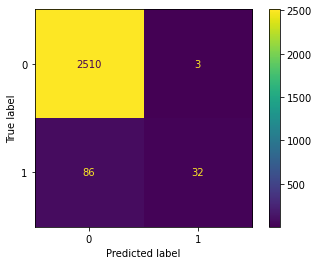

In [ ]:
vec = CountVectorizer()
X_train_vec = vec.fit_transform(X_train_expt["title"])
X_test_vec = vec.transform(X_test_expt["title"])

lr_experiment = LogisticRegression()
y_pred_expt = fit_predict(X_train_vec,y_train_expt,X_test_vec,model = lr_experiment)
model_evaluation(y_pred= y_pred_expt, y_true = y_test_expt, model=lr_experiment)

Model used: LogisticRegression()
Imbalanced accuracy score : 96.66 %
Balanced accuracy score: 63.92 %
auc score: 63.92 %
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2513
           1       0.92      0.28      0.43       118

    accuracy                           0.97      2631
   macro avg       0.94      0.64      0.71      2631
weighted avg       0.96      0.97      0.96      2631



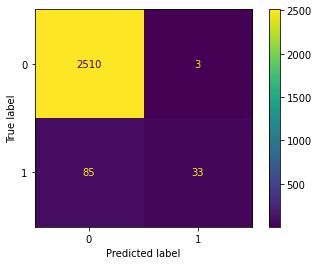

In [ ]:
encoder = LabelBinarizer(sparse_output=True)

X_train_enc = encoder.fit_transform(X_train_expt['function'])
X_test_enc = encoder.fit_transform(X_test_expt['function'])

X_train_final = hstack((X_train_vec, X_train_enc))
X_test_final = hstack((X_test_vec, X_test_enc))

y_pred_final = fit_predict(X_train_final,y_train_expt,X_test_final,model = lr_experiment)
model_evaluation(y_pred= y_pred_final, y_true = y_test_expt, model=lr_experiment)

4. Feature Engineered Data Model Evaluation (All columns)

In [ ]:
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy", random_state=0)
lr = LogisticRegression()
xgb = XGBClassifier(n_estimators= 150, learning_rate=0.3, max_depth=7,n_jobs = -1,max_leaves=3,random_state = 42)

y_pred_rf = fit_predict(X_train,y_train,X_test, model=rf)
y_pred_lr = fit_predict(X_train,y_train,X_test, model=lr)
y_pred_xgb = fit_predict(X_train, y_train, X_test, model=xgb)

Model used: LogisticRegression()
Imbalanced accuracy score : 95.73 %
Balanced accuracy score: 54.56 %
auc score: 54.56 %
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2479
           1       0.79      0.09      0.17       119

    accuracy                           0.96      2598
   macro avg       0.87      0.55      0.57      2598
weighted avg       0.95      0.96      0.94      2598



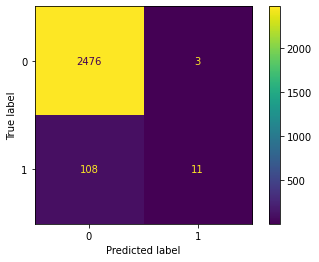

In [ ]:
model_evaluation(y_test, y_pred_lr, lr)

Model used: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
Imbalanced accuracy score : 98.5 %
Balanced accuracy score: 86.01 %
auc score: 86.01 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2479
           1       0.93      0.72      0.82       119

    accuracy                           0.98      2598
   macro avg       0.96      0.86      0.90      2598
weighted avg       0.98      0.98      0.98      2598



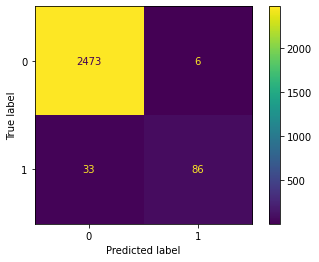

In [ ]:
model_evaluation(y_test,y_pred_rf,rf)

Model used: XGBClassifier(learning_rate=0.3, max_depth=7, max_leaves=3, n_estimators=150,
              n_jobs=-1, random_state=42)
Imbalanced accuracy score : 98.77 %
Balanced accuracy score: 90.95 %
auc score: 90.95 %
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2479
           1       0.90      0.82      0.86       119

    accuracy                           0.99      2598
   macro avg       0.95      0.91      0.93      2598
weighted avg       0.99      0.99      0.99      2598



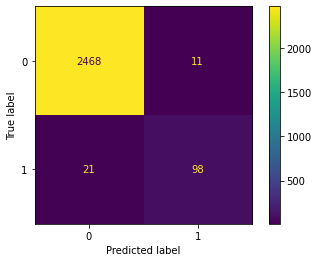

In [ ]:
model_evaluation(y_test, y_pred_xgb, xgb)

# Step 7: UnderSampling

In [ ]:
X = selected_df.drop(columns=["merged_text", "fraudulent"])
y = selected_df["fraudulent"]

(X_train, X_test, 
 y_train, 
 y_test) = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

SAMPLING_STRATEGY = 0.8

rus = RandomUnderSampler(sampling_strategy=SAMPLING_STRATEGY, random_state=RANDOM_STATE)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_test_rus, y_test_rus = rus.fit_resample(X_test, y_test)

In [ ]:
columns_transformer = ColumnTransformer(
    [("ct1", CountVectorizer(analyzer='word', stop_words=english_stopwords, lowercase=True), "title"),
    ("ct2", TfidfVectorizer(analyzer='word', stop_words=english_stopwords, lowercase=True), "cleaned_text"),
    ("ct3", OneHotEncoder(handle_unknown="ignore"), ["function"])], 
    remainder="passthrough"
)
set_config(display='diagram')
columns_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ct1',
                                 CountVectorizer(stop_words=['i', 'me', 'my',
                                                             'myself', 'we',
                                                             'our', 'ours',
                                                             'ourselves', 'you',
                                                             "you're", "you've",
                                                             "you'll", "you'd",
                                                             'your', 'yours',
                                                             'yourself',
                                                             'yourselves', 'he',
                                                             'him', 'his',
                                                             'himself', 'she',
                                                             "she's", 'her',
                                                             'hers', 'herself',
                                                             'it', "it's",
                                                             'its', 'itself', ...]),
                                 'title'),
                                ('ct2',
                                 TfidfVectorizer(stop_words=['i', 'me', 'my',
                                                             'myself', 'we',
                                                             'our', 'ours',
                                                             'ourselves', 'you',
                                                             "you're", "you've",
                                                             "you'll", "you'd",
                                                             'your', 'yours',
                                                             'yourself',
                                                             'yourselves', 'he',
                                                             'him', 'his',
                                                             'himself', 'she',
                                                             "she's", 'her',
                                                             'hers', 'herself',
                                                             'it', "it's",
                                                             'its', 'itself', ...]),
                                 'cleaned_text'),
                                ('ct3', OneHotEncoder(handle_unknown='ignore'),
                                 ['function'])])

In [ ]:
pipeline_lr = Pipeline(
    [
        ("columns_transformer", columns_transformer),
        ("logisticregression", lr)
    ]
)
set_config(display='diagram')
pipeline_lr

Pipeline(steps=[('columns_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ct1',
                                                  CountVectorizer(stop_words=['i',
                                                                              'me',
                                                                              'my',
                                                                              'myself',
                                                                              'we',
                                                                              'our',
                                                                              'ours',
                                                                              'ourselves',
                                                                              'you',
                                                                              "you're",
                                                                              "you've",
                                                                              "you'll",
                                                                              "you'd",
                                                                              'your',
                                                                              'yours',
                                                                              'yourself',
                                                                              'yourselves',
                                                                              'he',
                                                                              'him',
                                                                              'his',
                                                                              'himself',
                                                                              'she',
                                                                              "she's",
                                                                              'her',
                                                                              'hers',
                                                                              'herself',
                                                                              'it',
                                                                              "it's",
                                                                              'its',
                                                                              'itse...
                                                                              'me',
                                                                              'my',
                                                                              'myself',
                                                                              'we',
                                                                              'our',
                                                                              'ours',
                                                                              'ourselves',
                                                                              'you',
                                                                              "you're",
                                                                              "you've",
                                                                              "you'll",
                                                                              "you'd",
                                                                              'your',
                                                                              'yours',
                                       

Imbalanced accuracy score : 86.86 %
Balanced accuracy score: 86.79 %
auc score: 86.79 %
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       207
           1       0.85      0.86      0.85       166

    accuracy                           0.87       373
   macro avg       0.87      0.87      0.87       373
weighted avg       0.87      0.87      0.87       373



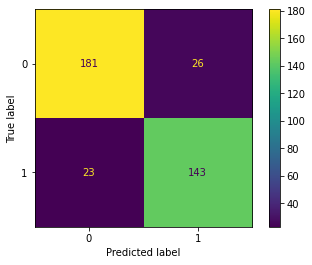

In [ ]:
y_pred_pipe_lr_rus = fit_predict(X_train_rus,y_train_rus,X_test_rus, pipeline=pipeline_lr)
model_evaluation(y_test_rus, y_pred_pipe_lr_rus, pipeline = pipeline_lr)

In [ ]:
pipeline_rf = Pipeline(
    [
        ("columns_transformer", columns_transformer),
        ("logisticregression", rf)
    ]
)
set_config(display='diagram')
pipeline_rf

Pipeline(steps=[('columns_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ct1',
                                                  CountVectorizer(stop_words=['i',
                                                                              'me',
                                                                              'my',
                                                                              'myself',
                                                                              'we',
                                                                              'our',
                                                                              'ours',
                                                                              'ourselves',
                                                                              'you',
                                                                              "you're",
                                                                              "you've",
                                                                              "you'll",
                                                                              "you'd",
                                                                              'your',
                                                                              'yours',
                                                                              'yourself',
                                                                              'yourselves',
                                                                              'he',
                                                                              'him',
                                                                              'his',
                                                                              'himself',
                                                                              'she',
                                                                              "she's",
                                                                              'her',
                                                                              'hers',
                                                                              'herself',
                                                                              'it',
                                                                              "it's",
                                                                              'its',
                                                                              'itse...
                                                                              'you',
                                                                              "you're",
                                                                              "you've",
                                                                              "you'll",
                                                                              "you'd",
                                                                              'your',
                                                                              'yours',
                                                                              'yourself',
                                                                              'yourselves',
                                                                              'he',
                                                                              'him',
                                                                              'his',
                                                                              'himself',
                                                                              'she',
                               

Imbalanced accuracy score : 86.86 %
Balanced accuracy score: 86.79 %
auc score: 86.79 %
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       207
           1       0.85      0.86      0.85       166

    accuracy                           0.87       373
   macro avg       0.87      0.87      0.87       373
weighted avg       0.87      0.87      0.87       373



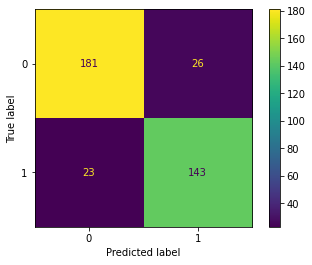

In [ ]:
y_pred_pipe_rf_rus = fit_predict(X_train_rus,y_train_rus,X_test_rus, pipeline=pipeline_lr)
model_evaluation(y_test_rus, y_pred_pipe_rf_rus, pipeline = pipeline_rf)

# Step 8: Over Sampling

In [ ]:
ros = RandomOverSampler(random_state=RANDOM_STATE)
X_train_ros, y_train_ros = rus.fit_resample(X_train, y_train)
X_test_ros, y_test_ros = rus.fit_resample(X_test, y_test)

Imbalanced accuracy score : 86.86 %
Balanced accuracy score: 86.79 %
auc score: 86.79 %
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       207
           1       0.85      0.86      0.85       166

    accuracy                           0.87       373
   macro avg       0.87      0.87      0.87       373
weighted avg       0.87      0.87      0.87       373



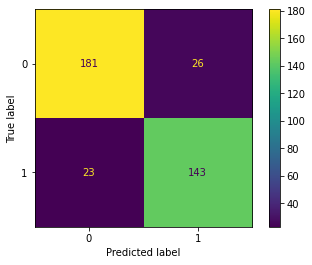

In [ ]:
y_pred_pipe_lr_ros = fit_predict(X_train_ros,y_train_ros,X_test_ros, pipeline=pipeline_lr)
model_evaluation(y_test_ros, y_pred_pipe_lr_ros, pipeline = pipeline_lr)

Imbalanced accuracy score : 87.67 %
Balanced accuracy score: 86.74 %
auc score: 86.74 %
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       207
           1       0.93      0.78      0.85       166

    accuracy                           0.88       373
   macro avg       0.89      0.87      0.87       373
weighted avg       0.88      0.88      0.88       373



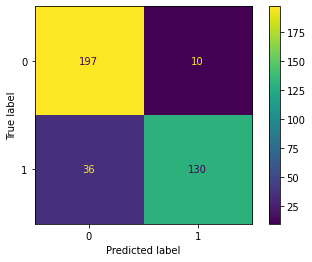

In [ ]:
y_pred_pipe_rf_ros = fit_predict(X_train_ros,y_train_ros,X_test_ros, pipeline=pipeline_rf)
model_evaluation(y_test_ros, y_pred_pipe_rf_ros, pipeline = pipeline_rf)

# Step 9: Hyperparameter Tuning 

We have used 3 different models for tuning. We used `GridSearchCV` to search the best parameters over the models.

We will again be feature engineering the given **data**.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/project/fake_job_postings.csv")

In [ ]:
for o in ["location", "salary_range", "description", "requirements", "benefits", "company_profile", "function"]:
    data[f"{o}_isna"] = data[o].isna()

object_columns = data.select_dtypes(include="object").columns
data[object_columns] = data[object_columns].replace(np.nan, "", regex=True)
data["merged_text"] = data[["requirements", "company_profile", "description"]].apply(lambda x: " ".join(x), axis=1)
data["merged_text"] = data["merged_text"].apply(lambda x: clean_text(x))

In [ ]:
selected_columns = [o for o in list(data.columns) if "isna" in o] + ["title", "merged_text", "function", \
                    "has_company_logo", "fraudulent"]
data_df = data[selected_columns] 
data_df.columns

Index(['location_isna', 'salary_range_isna', 'description_isna',
       'requirements_isna', 'benefits_isna', 'company_profile_isna',
       'function_isna', 'title', 'merged_text', 'function', 'has_company_logo',
       'fraudulent'],
      dtype='object')

In [ ]:
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()
english_stopwords = stopwords.words('english')

In [ ]:
data_df["cleaned_text"] = data_df["merged_text"].apply(lambda x: tokenize_and_lemmatize(x))

In [ ]:
X = data_df.drop(columns=["merged_text", "fraudulent"])
y = data_df["fraudulent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

SAMPLING_STRATEGY = 0.8

rus = RandomUnderSampler(sampling_strategy=SAMPLING_STRATEGY, random_state=RANDOM_STATE)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
X_test_rus, y_test_rus = rus.fit_resample(X_test, y_test)

In [ ]:
columns_transformer = ColumnTransformer(
    [("ct1", CountVectorizer(analyzer='word', stop_words=english_stopwords, lowercase=True), "title"),
    ("ct2", TfidfVectorizer(analyzer='word', stop_words=english_stopwords, lowercase=True), "cleaned_text"),
    ("ct3", OneHotEncoder(handle_unknown="ignore"), ["function"])], 
    remainder="passthrough"
)
set_config(display='diagram')
columns_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ct1',
                                 CountVectorizer(stop_words=['i', 'me', 'my',
                                                             'myself', 'we',
                                                             'our', 'ours',
                                                             'ourselves', 'you',
                                                             "you're", "you've",
                                                             "you'll", "you'd",
                                                             'your', 'yours',
                                                             'yourself',
                                                             'yourselves', 'he',
                                                             'him', 'his',
                                                             'himself', 'she',
                                                             "she's", 'her',
                                                             'hers', 'herself',
                                                             'it', "it's",
                                                             'its', 'itself', ...]),
                                 'title'),
                                ('ct2',
                                 TfidfVectorizer(stop_words=['i', 'me', 'my',
                                                             'myself', 'we',
                                                             'our', 'ours',
                                                             'ourselves', 'you',
                                                             "you're", "you've",
                                                             "you'll", "you'd",
                                                             'your', 'yours',
                                                             'yourself',
                                                             'yourselves', 'he',
                                                             'him', 'his',
                                                             'himself', 'she',
                                                             "she's", 'her',
                                                             'hers', 'herself',
                                                             'it', "it's",
                                                             'its', 'itself', ...]),
                                 'cleaned_text'),
                                ('ct3', OneHotEncoder(handle_unknown='ignore'),
                                 ['function'])])

In [ ]:
def evaluate_cv(pipeline,param_grid,X_train,y_train,X_test,y_test,cv=5):
  grid_cv = GridSearchCV(pipeline, param_grid=param_grid,
                         scoring=["accuracy", "roc_auc"],
                         refit="roc_auc",cv=cv,n_jobs=-1)
  set_config(display='diagram')
  y_pred = fit_predict(X_train,y_train,X_test, pipeline=grid_cv)
  print(f"Best params: {grid_cv.best_params_}")
  model_evaluation(y_test, y_pred, pipeline = grid_cv)
  print("\n\n")
  display(grid_cv)
  print("\n\n")
  print("Confusion Matrix:")
  return grid_cv

Best params: {'logisticregression__C': 50, 'logisticregression__multi_class': 'multinomial', 'logisticregression__solver': 'newton-cg'}
Imbalanced accuracy score : 94.35 %
Balanced accuracy score: 94.14 %
auc score: 94.14 %
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       226
           1       0.95      0.92      0.94       181

    accuracy                           0.94       407
   macro avg       0.94      0.94      0.94       407
weighted avg       0.94      0.94      0.94       407






GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columns_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ct1',
                                                                         CountVectorizer(stop_words=['i',
                                                                                                     'me',
                                                                                                     'my',
                                                                                                     'myself',
                                                                                                     'we',
                                                                                                     'our',
                                                                                                     'ours',
                                                                                                     'ourselves',
                                                                                                     'you',
                                                                                                     "you're",
                                                                                                     "you've",
                                                                                                     "you'll",
                                                                                                     "you'd",
                                                                                                     'your',
                                                                                                     'yours',
                                                                                                     'yourself',
                                                                                                     'yourselves',
                                                                                                     'he',
                                                                                                     'him',
                                                                                                     'his',
                                                                                                     'himself',
                                                                                                     'she',
                                                                                                     "she's",
                                                                                                     'her',
                                                                                                     'hers',
                                                                                                     'hers...
                                                                         'cleaned_text'),
                                                                        ('ct3',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['function'])])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [10, 30, 50],
                         'logisticregression__multi_class': ['multinomial',
                                                             'auto'],
                         'logisticregression__solver': ['newton-cg',
                                                        'liblinear']},
             refit




Confusion Matrix:


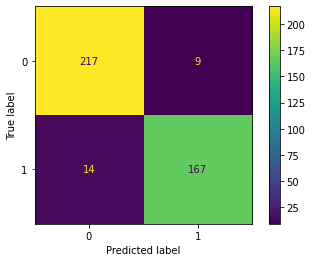

In [ ]:
pipeline_grid_lr = Pipeline(
    [
        ("columns_transformer", columns_transformer),
        ("logisticregression", LogisticRegression(random_state=RANDOM_STATE))
    ]
)

param_grid = {
                    'logisticregression__C': [10, 30, 50],
                    'logisticregression__solver': ["newton-cg", "liblinear"],
                    'logisticregression__multi_class': ["multinomial", "auto"]
                }

lr_cv = evaluate_cv(pipeline_grid_lr, param_grid,X_train_rus, y_train_rus,X_test_rus, y_test_rus)

Best params: {'decisiontree__ccp_alpha': 0.01, 'decisiontree__criterion': 'entropy', 'decisiontree__max_depth': 25, 'decisiontree__splitter': 'random'}
Imbalanced accuracy score : 89.68 %
Balanced accuracy score: 89.88 %
auc score: 89.88 %
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       226
           1       0.86      0.92      0.89       181

    accuracy                           0.90       407
   macro avg       0.90      0.90      0.90       407
weighted avg       0.90      0.90      0.90       407






GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columns_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ct1',
                                                                         CountVectorizer(stop_words=['i',
                                                                                                     'me',
                                                                                                     'my',
                                                                                                     'myself',
                                                                                                     'we',
                                                                                                     'our',
                                                                                                     'ours',
                                                                                                     'ourselves',
                                                                                                     'you',
                                                                                                     "you're",
                                                                                                     "you've",
                                                                                                     "you'll",
                                                                                                     "you'd",
                                                                                                     'your',
                                                                                                     'yours',
                                                                                                     'yourself',
                                                                                                     'yourselves',
                                                                                                     'he',
                                                                                                     'him',
                                                                                                     'his',
                                                                                                     'himself',
                                                                                                     'she',
                                                                                                     "she's",
                                                                                                     'her',
                                                                                                     'hers',
                                                                                                     'hers...
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['function'])])),
                                       ('decisiontree',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontree__ccp_alpha': [0.1, 0.01, 0.001],
                         'decisiontree__criterion': ['gini', 'entropy',
                                                     'log_loss'],
                         'decisiontree__max_depth': [10, 25, 50],
                         'decisiontree__splitter': ['best', 'random']},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'])




Confusion Matrix:


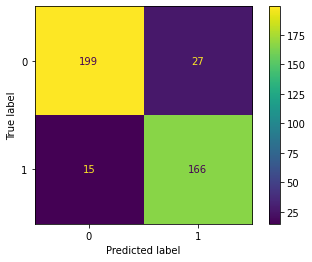

In [ ]:
pipeline_dt = Pipeline(
    [
        ("columns_transformer", columns_transformer),
        ("decisiontree", DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)
param_grid_dt = {
                    "decisiontree__criterion": ["gini", "entropy", "log_loss"],
                    "decisiontree__splitter": ["best", "random"],
                    "decisiontree__max_depth": [10, 25, 50],
                    "decisiontree__ccp_alpha": [0.1, 0.01, 0.001]
                }

dt_cv = evaluate_cv(pipeline_dt, param_grid_dt,X_train_rus, y_train_rus,X_test_rus, y_test_rus)

Best params: {'randomforest__ccp_alpha': 0.001, 'randomforest__criterion': 'entropy', 'randomforest__max_depth': 50, 'randomforest__min_samples_leaf': 2, 'randomforest__n_estimators': 100}
Imbalanced accuracy score : 93.61 %
Balanced accuracy score: 93.2 %
auc score: 93.2 %
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       226
           1       0.96      0.90      0.93       181

    accuracy                           0.94       407
   macro avg       0.94      0.93      0.93       407
weighted avg       0.94      0.94      0.94       407






GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columns_transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ct1',
                                                                         CountVectorizer(stop_words=['i',
                                                                                                     'me',
                                                                                                     'my',
                                                                                                     'myself',
                                                                                                     'we',
                                                                                                     'our',
                                                                                                     'ours',
                                                                                                     'ourselves',
                                                                                                     'you',
                                                                                                     "you're",
                                                                                                     "you've",
                                                                                                     "you'll",
                                                                                                     "you'd",
                                                                                                     'your',
                                                                                                     'yours',
                                                                                                     'yourself',
                                                                                                     'yourselves',
                                                                                                     'he',
                                                                                                     'him',
                                                                                                     'his',
                                                                                                     'himself',
                                                                                                     'she',
                                                                                                     "she's",
                                                                                                     'her',
                                                                                                     'hers',
                                                                                                     'hers...
                                                                         ['function'])])),
                                       ('randomforest',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforest__ccp_alpha': [0.1, 0.01, 0.001],
                         'randomforest__criterion': ['gini', 'entropy',
                                                     'log_loss'],
                         'randomforest__max_depth': [10, 25, 50],
                         'randomforest__min_samples_leaf': [2, 5, 10],
                         'randomforest__n_estimators': [10, 50, 100]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'])




Confusion Matrix:


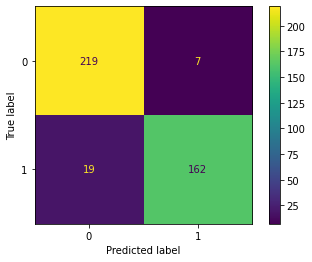

In [ ]:
pipeline_rf = Pipeline(
    [
        ("columns_transformer", columns_transformer),
        ("randomforest", RandomForestClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid_rf = {
                    "randomforest__n_estimators": [10, 50, 100],
                    "randomforest__criterion": ["gini", "entropy", "log_loss"],
                    "randomforest__max_depth": [10, 25, 50],
                    "randomforest__min_samples_leaf": [2, 5, 10],
                    "randomforest__ccp_alpha": [0.1, 0.01, 0.001]
                }

rf_cv = evaluate_cv(pipeline_rf,param_grid_rf,
            X_train_rus, y_train_rus, X_test_rus,y_test_rus)

# Step 10: Model Serialization and Deployment

In [ ]:
import joblib 
joblib.dump(lr_cv, '/content/drive/My Drive/project/logistic_regression.pkl')
joblib.dump(dt_cv, '/content/drive/My Drive/project/decision_tree.pkl')
joblib.dump(rf_cv, '/content/drive/My Drive/project/random_forest.pkl')

['/content/drive/My Drive/project/random_forest.pkl']

Testing with the Serialized file with `sample_input`.

In [ ]:
serialized_logistic_regression = joblib.load('/content/drive/My Drive/project/logistic_regression.pkl')

In [ ]:
sample_input = X_test_rus.iloc[370]; sample_input

location_isna                                                       False
salary_range_isna                                                    True
description_isna                                                    False
requirements_isna                                                   False
benefits_isna                                                       False
company_profile_isna                                                 True
function_isna                                                       False
title                                                CUSTOMER SERVICE REP
function                                                 Customer Service
has_company_logo                                                        0
cleaned_text            high school diploma descriptionjob title custo...
Name: 370, dtype: object

In [ ]:
serialized_logistic_regression.predict(X_test_rus.iloc[370].to_frame().T)

array([1])